In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ketsaris_like import FindPi
from scipy import optimize
from multiprocessing import Pool

/usr/local/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


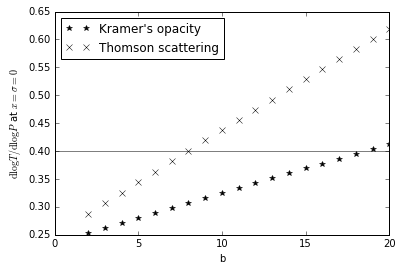

In [27]:
bs = np.arange(2,21)

plt.xlim([0, bs.max()])
plt.xlabel(r'b')
plt.ylabel(r'$\mathrm{d}\log T / \mathrm{d}\log P$ at $x = \sigma = 0$')

for b in bs:
    fp = FindPi(1e6, heating=(b, 0.), transfer='absorption')
    Nc = fp.dlogTdlogP_centr()
    absorption, = plt.plot(b, Nc, 'k*')
absorption.set_label("Kramer's opacity")
    
for b in bs:
    fp = FindPi(1e6, heating=(b, 0.), transfer='scattering')
    Nc = fp.dlogTdlogP_centr()
    scattering, = plt.plot(b, Nc, 'kx')
scattering.set_label("Thomson scattering")

c = np.fromstring('-0.08458126  0.01351309  0.03030497  0.12380213 -0.0755892', sep=' ')
#plt.plot(bs, 0.4 + c[0] + c[1]*bs + c[2]*fp.d + c[3]*fp.varsigma + c[4]*fp.psi)
plt.plot(plt.xlim(), 0.4*np.ones_like(plt.xlim()), 'k-', linewidth=0.5)
plt.legend(loc='best')
plt.savefig('dlogTdlogP.eps')

########################

# ds = np.linspace(0,2,10)

# plt.xlabel(r'd')
# plt.ylabel(r'$\mathrm{d}\log T / \mathrm{d}\log P$')
# plt.plot(ds, 0.4*np.ones_like(ds))

# for d in ds:
#     fp = FindPi(1e6, heating=(2.5, d), transfer='scattering')
#     Nc = fp.dlogTdlogP_centr()
#     plt.plot(d, Nc, 'kx')
# #plt.plot(ds, 0.4 + c[0] + c[1]*fp.b + c[2]*ds + c[3]*fp.varsigma + c[4]*fp.psi)
# plt.show()

In [50]:
for transfer, b0 in (('absorption', 18), ('scattering', 8),):
    b, rootres = optimize.brentq(
        lambda b: FindPi(1e6, heating=(b, 0), transfer=transfer).dlogTdlogP_centr() - 0.4,
        a = 0.9 * b0,
        b = 1.1 * b0,
        xtol = 1e-2,
        full_output = True,
    )
    print('For {} b = {}'.format(transfer, b))

/usr/local/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


For absorption b = 18.53549667749216
For scattering b = 7.97085487805288
